## CISC/CMPE 251 Assignment 1 (Programming)

This assignment covers various aspects of data preprocessing, including data exploration, cleaning, outlier detection, feature engineering, normalization, standardization, binning, transformation, and visualization.

The assignment uses the Titanic dataset, which is a classic dataset for practicing data preprocessing and analysis techniques. Here's a brief overview of each question:

1.  Data Exploration: Students will use pandas functions to explore the dataset.
1. Data Cleaning: Handling missing values and removing duplicates.
1. Outlier Detection and Handling: Using statistical methods and visualization to detect and handle outliers.
1. Feature Engineering: Creating new features and encoding categorical variables.
1. Data Normalization and Standardization: Applying different scaling techniques and comparing results.
1. Binning: Creating age groups and visualizing the distribution.
1. Data Transformation: Applying log transformation to handle skewed data.
1. Correlation Analysis: Calculating and visualizing correlations between features.
1. Data Visualization: Creating various plots to gain insights from the data.
1. Feature Selection: Selecting and justifying the most important features for prediction.

### Necessary Packages

In [1]:
# Data Preprocessing Techniques Assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

### Load the dataset

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

### Question 1: Data Exploration
- Explore the dataset using appropriate pandas functions. 
- a) Display the first 5 rows of the dataset.
- b) Show the basic information about the dataset including column names, data types, and non-null counts.
- c) Calculate and display basic statistics of the numerical columns.

In [3]:

print("\n**************************QUESTION 1******************************\n")
# display the first 5 rows of data
print("first 5 rows: ")
print(df.head())

# showing basic info about the dataset 
print("\nbasic info: ")
df.info()

# calculate and display basic stats 
print("\nbasic stats: ")
print(df.describe())


**************************QUESTION 1******************************

first 5 rows: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            1138

### Question 2: Data Cleaning
- a) Identify and handle any missing values in the dataset.
- b) Remove any duplicates if they exist.

To handle missing data the values were summed into a total count by feature. As seen in the output there were 687 missing values for the Cabin feature. It was decided that the feature data was not recoverable given that 687/891 of the total values were missing. Though unfortunate, as this information may have been correlated to survival rate, the cabin feature was dropped completely. With age there were 177 missing values. The missing ages were replaced with the feature mean. Finally, there were 2 missing values within embarked. Since this is such a low number, those rows were removed completely which will have little impact on the dataset overall.

In [4]:
print("\n\n**************************QUESTION 2******************************\n")
# scan for missing values 
print("missing values: ")
print(df.isnull().sum())

# remove the cabin column
df.drop('Cabin', axis=1, inplace=True)

# replace any missing values in age with the mean age
df['Age'] = df['Age'].fillna(df['Age'].mean())

# remove any remaining rows w missing values 
df = df.dropna()

# print first 5 rows of data in the cleaned dataset
print ("\ndataset post removal of rows of missing vals: ")
print(df.head())

# check again to confirm the removal of missing values 
print("missing values: ")
print(df.isnull().sum())

# remove any duplicates 
df = df.drop_duplicates()



**************************QUESTION 2******************************

missing values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

dataset post removal of rows of missing vals: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                     

### Question 3: Outlier Detection and Handling
 - a) Use appropriate statistical methods to detect outliers in the 'Age' column.
 - b) Create a box plot to visualize the outliers.
 - c) Handle the outliers using a method of your choice (e.g., removal, capping).

Both Z Score and Tukey's Fences were used to detect outliers. Only Tukey's Fences method was used for removal since the outliers detected by Z score method should be fully covered. 



**************************QUESTION 3******************************

outliers detected w z-score: 
     PassengerId  Survived  Pclass                                  Name  \
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Embarked  
96   male  71.0      0      0    PC 17754  34.6542        C  
116  male  70.5      0      0      370369   7.7500        Q  
493  male  71.0      0      0    PC 17609  49.5042        C  
630  male  80.0      0      0       27042  

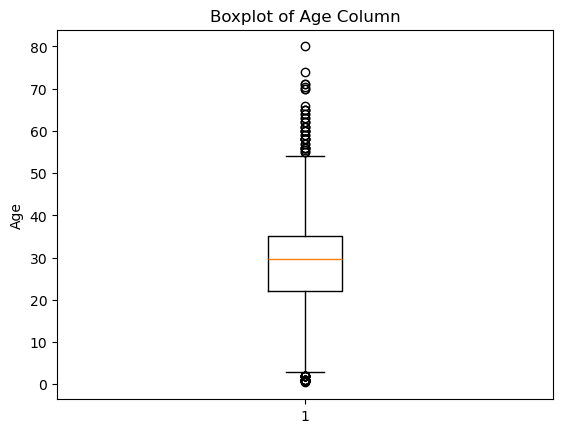

In [5]:
print("\n\n**************************QUESTION 3******************************\n")
# outlier detection w z score 
z_scores = stats.zscore(df['Age'])
zscore_outliers = df[abs(z_scores) > 3]

print("outliers detected w z-score: ")
print(zscore_outliers)

# outlier detection w tukey's fences 
# calculate the q1 = 25th percentile and q3 = 75th percentile 
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)

# calculate the iqr 
iqr = (q3 - q1)

# calculate bounds on outliers 
lower_bound = (q1 - 1.5*iqr)
upper_bound = (q3 + 1.5*iqr)

iqr_outliers = df[(df['Age']< lower_bound) | (df['Age'] > upper_bound)]

print("\noutliers detected w iqr: ")
print("upper fence: ", upper_bound)
print("lower fence: ", lower_bound)
print(iqr_outliers)

# boxplot visualization 
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of Age Column')
plt.ylabel('Age')
plt.show()

# remove the outliers determined by tukey's fences 
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

### Question 4: Feature Engineering
- a) Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'.
- b) Convert the 'Sex' column to numerical using appropriate encoding.

Family size was defined by summing SibSp and Parch values as well as adding one to consider the individual themself.

In [6]:
print("\n\n**************************QUESTION 4******************************\n")
# create a new feature called familysize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 

# print the first 5 rows with the new feature and it's components
print(df[['SibSp', 'Parch', 'FamilySize']].head())

# convert sex to numerical 
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# print the first 5 rows of the sex column to display the new format
print(df[['Sex']].head())



**************************QUESTION 4******************************

   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1
   Sex
0    0
1    1
2    1
3    1
4    0


### Question 5: Data Normalization and Standardization
- a) Apply Min-Max scaling to the 'Age' column.
- b) Apply Standardization (Z-score normalization) to the 'Fare' column.
- c) Compare the original and transformed data using histograms.



**************************QUESTION 5******************************

   og_age       Age
0    22.0  0.372549
1    38.0  0.686275
2    26.0  0.450980
3    35.0  0.627451
4    35.0  0.627451


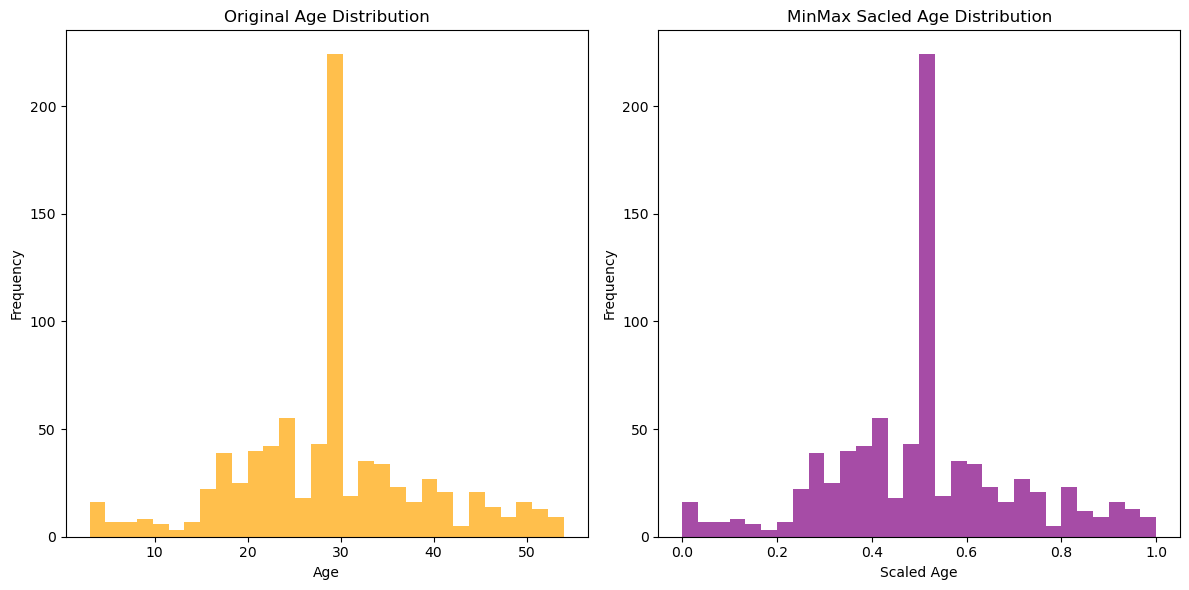

   og_fare      Fare
0   7.2500 -0.484194
1  71.2833  0.798324
2   7.9250 -0.470674
3  53.1000  0.434132
4   8.0500 -0.468171


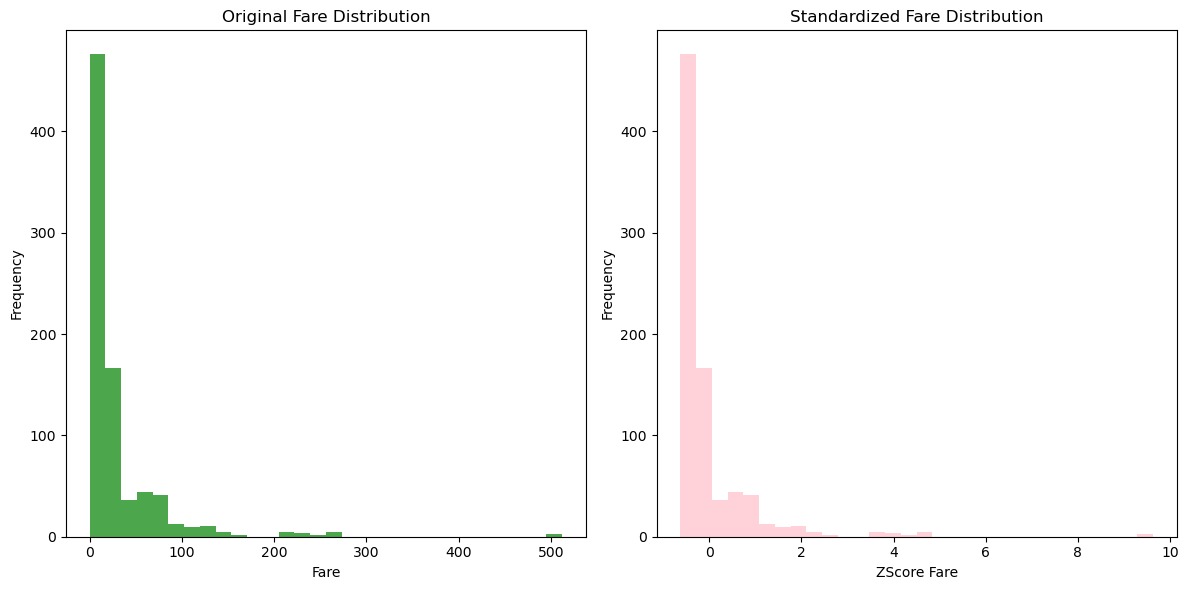

In [7]:
print("\n\n**************************QUESTION 5******************************\n")
# create a copy of the original data
df['og_age'] = df['Age'].copy()  

# apply min-max scaler 
Mscaler = MinMaxScaler()
df['Age'] = Mscaler.fit_transform(df[['Age']])

# comparison
compare_age = df[['og_age', 'Age']]
print(compare_age.head())

# create histogram 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['og_age'], bins=30, color='orange', alpha=0.7)
plt.title('Original Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Age'], bins=30, color='purple', alpha=0.7)
plt.title('MinMax Sacled Age Distribution')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# create a copy of the original data
df['og_fare'] = df['Fare'].copy() 

# apply standardization 
Sscaler = StandardScaler()
df['Fare'] = Sscaler.fit_transform(df[['Fare']])

# comparison 
compare_fare = df[['og_fare', 'Fare']]
print(compare_fare.head())

# create histogram 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['og_fare'], bins=30, color='green', alpha=0.7)
plt.title('Original Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Fare'], bins=30, color='pink', alpha=0.7)
plt.title('Standardized Fare Distribution')
plt.xlabel('ZScore Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Question 6: Binning
- a) Create age groups (bins) for the 'Age' column (e.g., 0-18, 19-30, 31-50, 51+).
- b) Visualize the distribution of passengers across these age groups using a bar plot.



**************************QUESTION 6******************************

   og_age AgeBins
0    22.0   19-30
1    38.0   31-50
2    26.0   19-30
3    35.0   31-50
4    35.0   31-50


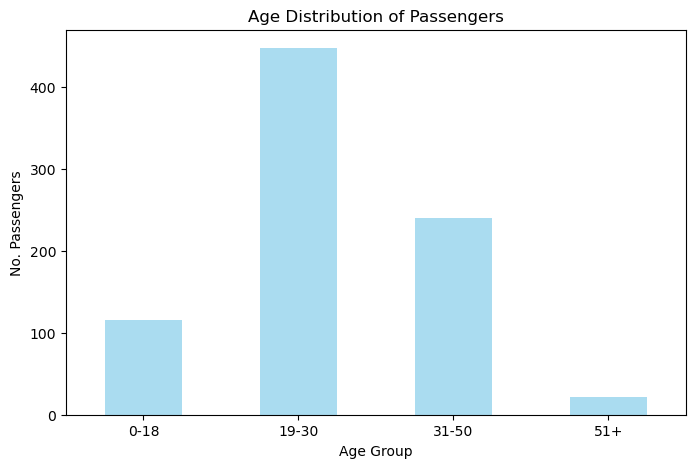

In [8]:
print("\n\n**************************QUESTION 6******************************\n")
# split age into bins
bins = [0, 18, 30, 50, float('inf')]
lbls = ['0-18', '19-30', '31-50', '51+']

# create bins 
df['AgeBins'] = pd.cut(df['og_age'], bins=bins, labels=lbls, right=True)

# print the first 5 rows of the ages and their corresponding bin
print (df[['og_age', 'AgeBins']].head())

# create visualization 
age_counter = df['AgeBins'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
age_counter.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age Group')
plt.ylabel('No. Passengers')

plt.xticks(rotation=0)
plt.show()

### Question 7: Data Transformation
- a) Apply a log transformation to the 'Fare' column to handle its skewed distribution.
- b) Visualize the original and transformed 'Fare' distributions using histograms.



**************************QUESTION 7******************************

   og_fare  log_fare
0   7.2500  2.110213
1  71.2833  4.280593
2   7.9250  2.188856
3  53.1000  3.990834
4   8.0500  2.202765


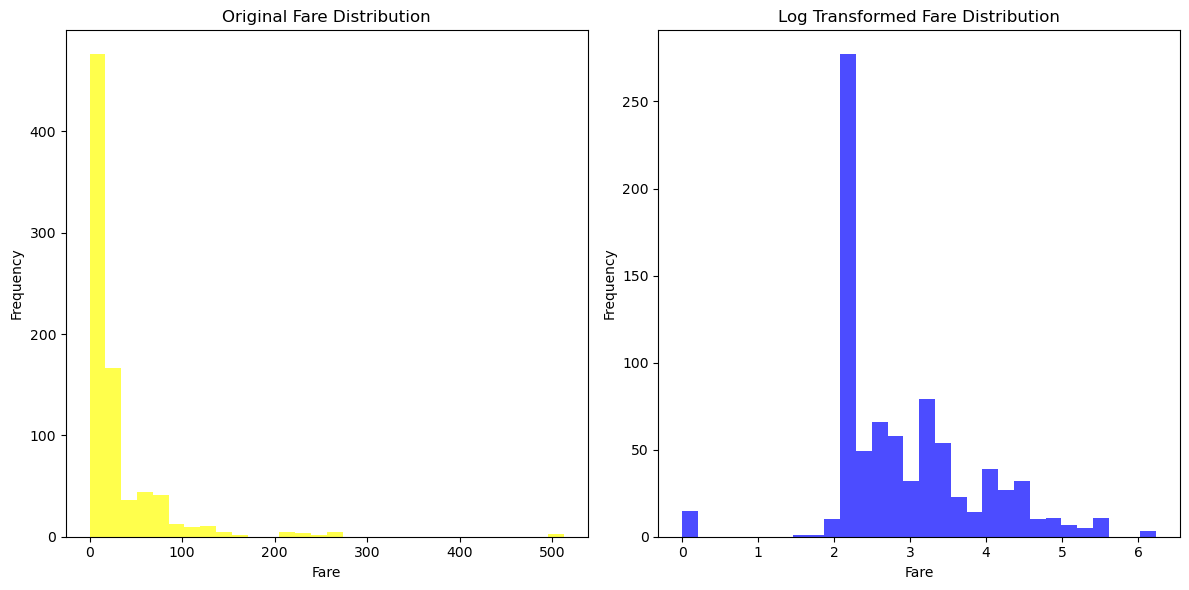

In [9]:
print("\n\n**************************QUESTION 7******************************\n")
# apply log transformation 
df['log_fare'] = np.log1p(df['og_fare'])

# print the first 5 rows comparing original fare with the log fare
print(df[['og_fare', 'log_fare']].head())

plt.figure(figsize=(12, 6))
# visualize original Fare distribution
plt.subplot(1, 2, 1)
plt.hist(df['og_fare'], bins=30, color='yellow', alpha=0.7)
plt.title('Original Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# visualize log transformed Fare distribution 
plt.subplot(1, 2, 2)
plt.hist(df['log_fare'], bins=30, color='blue', alpha=0.7)
plt.title('Log Transformed Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show() 

### Question 8: Correlation Analysis
- a) Calculate the correlation matrix for numerical features.
- b) Create a heatmap to visualize the correlations.
- c) Identify and list the top 3 most correlated feature pairs.

The top 3 correlated pairs are SibSp and FamilySize, FamilySize and Parch, and Sex and Survival.



**************************QUESTION 8******************************

             PassengerId  Survived    Pclass       Sex     SibSp     Parch  \
PassengerId     1.000000 -0.015866 -0.037108 -0.039365 -0.054004 -0.006968   
Survived       -0.015866  1.000000 -0.366204  0.552140 -0.030172  0.074975   
Pclass         -0.037108 -0.366204  1.000000 -0.156008  0.056938  0.017887   
Sex            -0.039365  0.552140 -0.156008  1.000000  0.123239  0.263852   
SibSp          -0.054004 -0.030172  0.056938  0.123239  1.000000  0.408337   
Parch          -0.006968  0.074975  0.017887  0.263852  0.408337  1.000000   
FamilySize     -0.040459  0.016926  0.047941  0.216609  0.889194  0.780739   
og_age          0.050168 -0.028750 -0.284954 -0.060270 -0.181730 -0.130644   
og_fare         0.017033  0.268587 -0.551968  0.186628  0.167292  0.190662   

             FamilySize    og_age   og_fare  
PassengerId   -0.040459  0.050168  0.017033  
Survived       0.016926 -0.028750  0.268587  
Pclass     

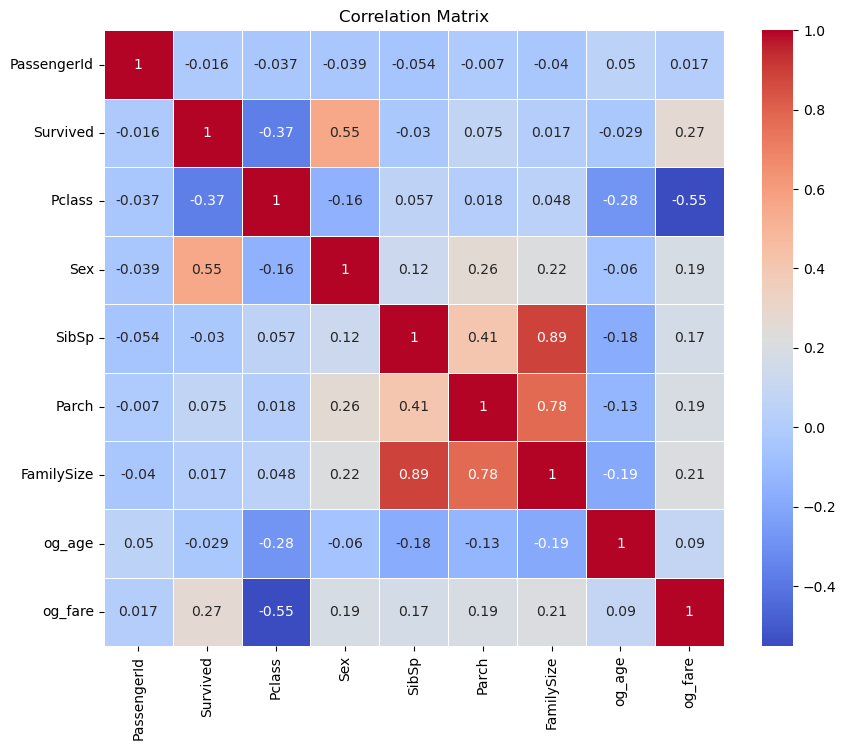

top 3 most correlated features: 

FamilySize  SibSp         0.889194
SibSp       FamilySize    0.889194
FamilySize  Parch         0.780739
Parch       FamilySize    0.780739
Survived    Sex           0.552140
Sex         Survived      0.552140
dtype: float64


In [10]:
print("\n\n**************************QUESTION 8******************************\n")
# calculate the correlation matrix for numerical values ommiting the scaled values
numerical_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Age', 'log_fare', 'Fare'], errors='ignore')
correlation_matrix = numerical_df.corr()

# print the correlations 
print(correlation_matrix)

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# unstack the matrix and determine the top 3 correlated pairs 
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs != 1]
sorting = correlation_pairs.abs().sort_values(ascending=False)
top_3 = sorting.head(6)
print("top 3 most correlated features: \n")
print(top_3)

### Question 9: Data Visualization
- Create at least three different types of plots to reveal insights about the dataset. 
- Explain your findings for each plot.

Three types of plots were visualized in order to better understand the data.

1. The first plot created is a box plot intended to give a better idea of family sizes within the sample. We are able to draw a few observations from this visual. Within the dataset the average family size was just one. In terms of SibSp, and Parch their averages were zero, with just a few outliers. These results make sense since the family size has to be at least one (the individual themself) and family size as well as the other two feature are related. It is determined that there were not many large family's present on the flight and most passengers were solo flyers.
2. The second plot constructed is a violin plot demonstrating the class by age. Here we are able to see where the age distribution falls between classes. The most densely plotted age is approximately 30 which makes sense since to handle the missing age values the mean was taken as a replacement. We can also observe the surge of desity around the age of 50 within class one. The older passengers are more inclined to buy a first class ticket. And we can see the opposite for class 3 where there is a higher density around the age of 20, with the younger population spending less on their flights.
3. Finally a sex vs survival stacked bar graph was created. This plot gives great insight into which gender was more likely to have survived. We can draw two main conclusions from this visual. Firstly, we can see that there were more men on the flight than woman (we prviously mapped men: 0 and woman: 1). Secondly, we see that majority of men did not survive, whereas most of the woman on the flight did. Less than 100 woman had data displaying they did not survive and according to the stacked bar graph we gather approximately 200 did.

/var/folders/m6/rjrvgtg10tv5gwh41_lp2dp40000gn/T/ipykernel_27184/1712741855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feature', y='Value', data=melt_df, palette='Set2')
/var/folders/m6/rjrvgtg10tv5gwh41_lp2dp40000gn/T/ipykernel_27184/1712741855.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pclass', y='og_age', data=df, palette='Set2')


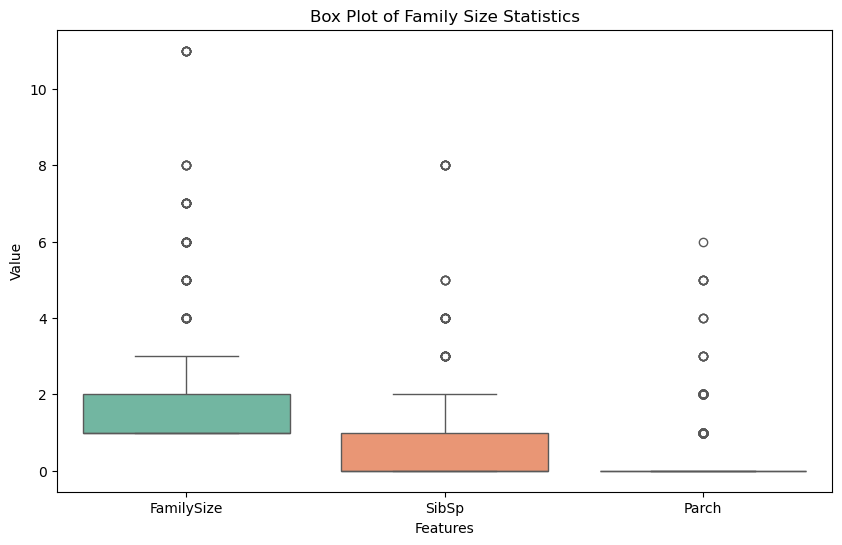

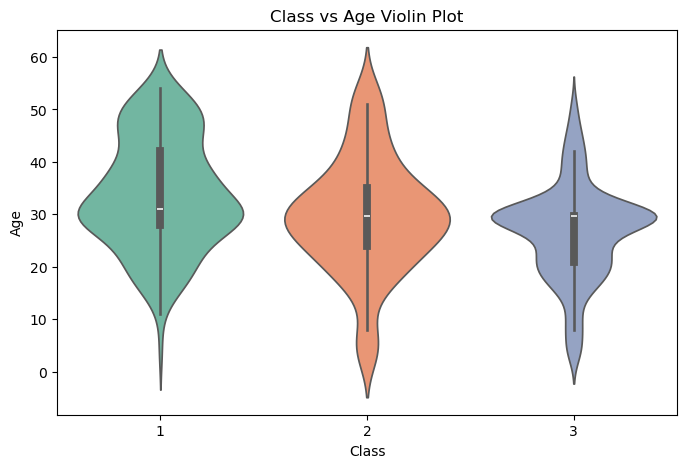

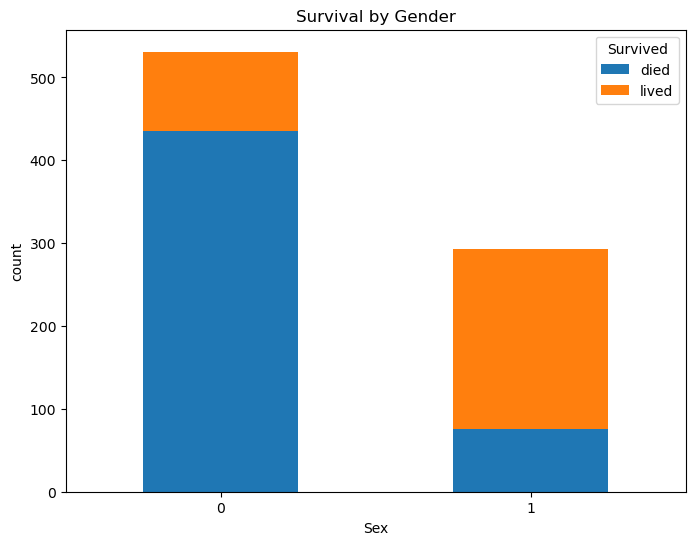

In [11]:

# box plot of family stats
# melt data frame so we can have multiple features in the box plot 
melt_df = df.melt(var_name='Feature', value_name='Value', value_vars=['FamilySize', 'SibSp', 'Parch'])

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=melt_df, palette='Set2')

# Add titles and labels
plt.title('Box Plot of Family Size Statistics')
plt.xlabel('Features')
plt.ylabel('Value')


# violin plot of age vs class 
plt.figure(figsize=(8, 5))
sns.violinplot(x='Pclass', y='og_age', data=df, palette='Set2')
plt.title('Class vs Age Violin Plot')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()


# stacked bar chart sex vs survival
survival_count = df.groupby(['Sex', 'Survived']).size().unstack()
survival_count.plot(kind='bar', stacked=True , color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('count')
plt.legend(title = 'Survived', labels=['died', 'lived'])
plt.xticks(rotation=0)
plt.show()


### Question 10: Feature Selection
- Based on your analysis, select the top 5 features you believe are most important for predicting survival. 
- Justify your choices.





Based on this analysis I believe the features most important to survival are sex, class, fare, parch, and sibsp. Below a correlation analysis is performed in order to understand the features with the highest correlation values to 'survived' whether the relationship be a negative correlation (as class decreases survival increases) or a positive correlation (as sex increases, with men as 0, woman as 1, survival increases, with died as 0, survived as 1). Theses were the top five feautes with the absolute highest correlation coefficients to the survival rate therefore I believe that they are the most important in predicting survival. More specifically I believe that the top 3 are most vital, as they have values within a tenth decimal place and we also know that on average the values of SibSp, and Parch are 0 so this is likely how they got higher correlation values (most people flew alone). 

In [13]:
# create survival correlation matrix 
survival_correlation = correlation_matrix['Survived'].drop('Survived')
# sort the correlations
sort_correlation = survival_correlation.abs().sort_values(ascending=False)

# print the features with the highest correlation to survival
print("Features with highest correlation to Survival:")
print(sort_correlation)

Features with highest correlation to Survival:
Sex            0.552140
Pclass         0.366204
og_fare        0.268587
Parch          0.074975
SibSp          0.030172
og_age         0.028750
FamilySize     0.016926
PassengerId    0.015866
Name: Survived, dtype: float64
